In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_excel("Data Statistika.xlsx")
df.head()

,Provinsi,Kepadatan Penduduk menurut Provinsi (jiwa/km2),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,2000,2005,2010,2015,2020
1,DKI JAKARTA,12592,12012,14518,15328,15907
2,JAWA BARAT,1010,1060,1222,1320,1365
3,JAWA TENGAH,952,972,989,1030,1113
4,DI YOGYAKARTA,996,1074,1107,1174,1171


In [101]:
df = df.rename(columns={"Kepadatan Penduduk menurut Provinsi (jiwa/km2)":"2000","Unnamed: 2":"2005","Unnamed: 3":"2010","Unnamed: 4":"2015","Unnamed: 5":"2020"})
df.head()

,Provinsi,2000,2005,2010,2015,2020
0,NaN,2000,2005,2010,2015,2020
1,DKI JAKARTA,12592,12012,14518,15328,15907
2,JAWA BARAT,1010,1060,1222,1320,1365
3,JAWA TENGAH,952,972,989,1030,1113
4,DI YOGYAKARTA,996,1074,1107,1174,1171


In [102]:
df.isna().sum()

Provinsi    1
2000        0
2005        0
2010        0
2015        0
2020        0
dtype: int64

In [103]:
df = df.dropna()
df.isna().sum()

Provinsi    0
2000        0
2005        0
2010        0
2015        0
2020        0
dtype: int64

In [104]:
df

,Provinsi,2000,2005,2010,2015,2020
1,DKI JAKARTA,12592,12012,14518,15328,15907
2,JAWA BARAT,1010,1060,1222,1320,1365
3,JAWA TENGAH,952,972,989,1030,1113
4,DI YOGYAKARTA,996,1074,1107,1174,1171
5,JAWA TIMUR,727,781,786,813,851
6,BANTEN,838,1006,1106,1237,1232


In [105]:
provinsi_di_jawa = ['JAWA TIMUR','JAWA TENGAH','DI YOGYAKARTA', 'JAWA BARAT', 'DKI JAKARTA', 'BANTEN']
is_in = df['Provinsi'].isin(provinsi_di_jawa)
df = df.loc[is_in]

In [106]:
df = df.sort_values(["Provinsi"])
df = df.reset_index(drop=True)
df.head()

,Provinsi,2000,2005,2010,2015,2020
0,BANTEN,838,1006,1106,1237,1232
1,DI YOGYAKARTA,996,1074,1107,1174,1171
2,DKI JAKARTA,12592,12012,14518,15328,15907
3,JAWA BARAT,1010,1060,1222,1320,1365
4,JAWA TENGAH,952,972,989,1030,1113


In [107]:
df_desc = df.describe()
df_desc

,2000,2005,2010,2015,2020
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2852.500000,2817.500000,3288.000000,3483.666667,3606.500000
std,4772.569947,4505.600149,5503.536063,5805.251025,6028.380471
min,727.000000,781.000000,786.000000,813.000000,851.000000
25%,866.500000,980.500000,1018.250000,1066.000000,1127.500000
50%,974.000000,1033.000000,1106.500000,1205.500000,1201.500000
75%,1006.500000,1070.500000,1193.250000,1299.250000,1331.750000
max,12592.000000,12012.000000,14518.000000,15328.000000,15907.000000


In [108]:
df_range = df_desc.loc['max'] - df_desc.loc['min']
df_range

2000    11865.0
2005    11231.0
2010    13732.0
2015    14515.0
2020    15056.0
dtype: float64

In [109]:
df_variance = df_desc.loc['std'] ** 2
df_variance_no_sci = df_variance.apply(lambda x: f"{x:.3f}")
df_variance_no_sci

2000    22777423.900
2005    20300432.700
2010    30288909.200
2015    33700939.467
2020    36341371.100
Name: std, dtype: object

In [110]:
df_melt = pd.melt(df, id_vars='Provinsi', var_name='Tahun', value_name='Kepadatan')
df_melt

,Provinsi,Tahun,Kepadatan
0,BANTEN,2000,838
1,DI YOGYAKARTA,2000,996
2,DKI JAKARTA,2000,12592
3,JAWA BARAT,2000,1010
4,JAWA TENGAH,2000,952
5,JAWA TIMUR,2000,727
6,BANTEN,2005,1006
7,DI YOGYAKARTA,2005,1074
8,DKI JAKARTA,2005,12012
9,JAWA BARAT,2005,1060


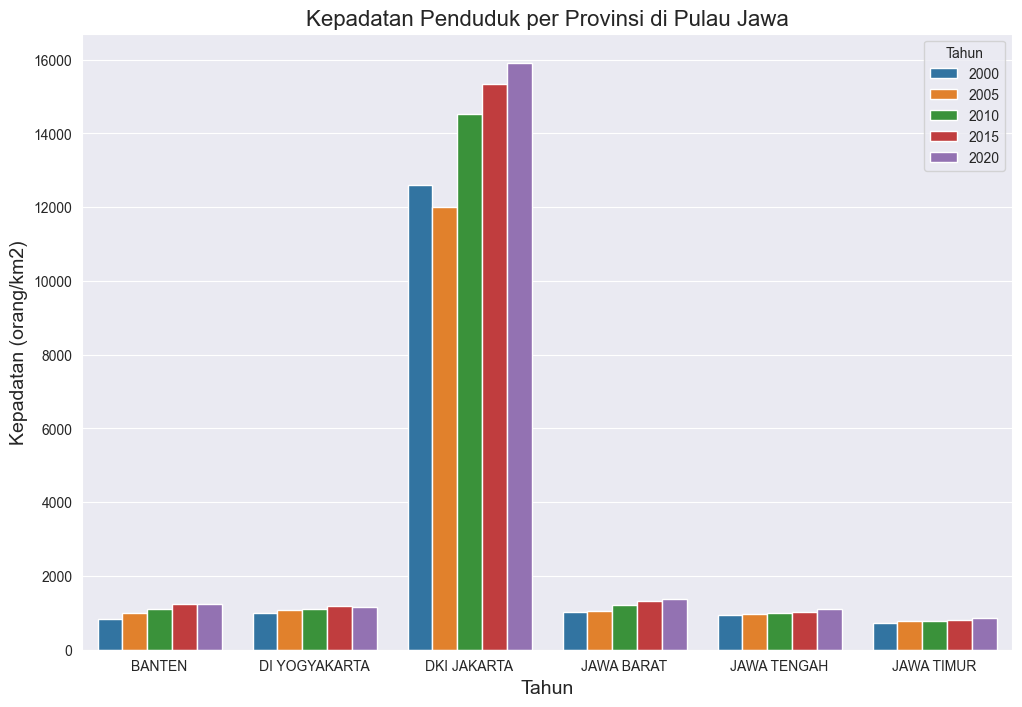

In [111]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.barplot(data=df_melt,x='Provinsi',y='Kepadatan',hue='Tahun')
plt.title('Kepadatan Penduduk per Provinsi di Pulau Jawa', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Kepadatan (orang/km2)', fontsize=14)
plt.show()

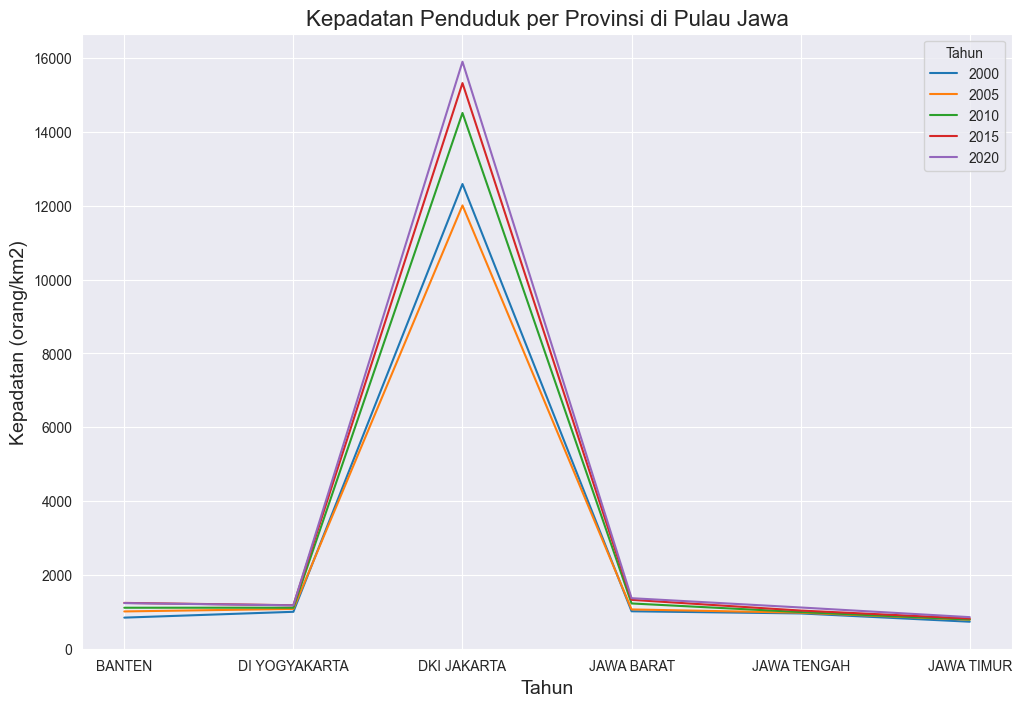

In [112]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.lineplot(data=df_melt,x='Provinsi',y='Kepadatan',hue='Tahun')
plt.title('Kepadatan Penduduk per Provinsi di Pulau Jawa', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Kepadatan (orang/km2)', fontsize=14)
plt.show()

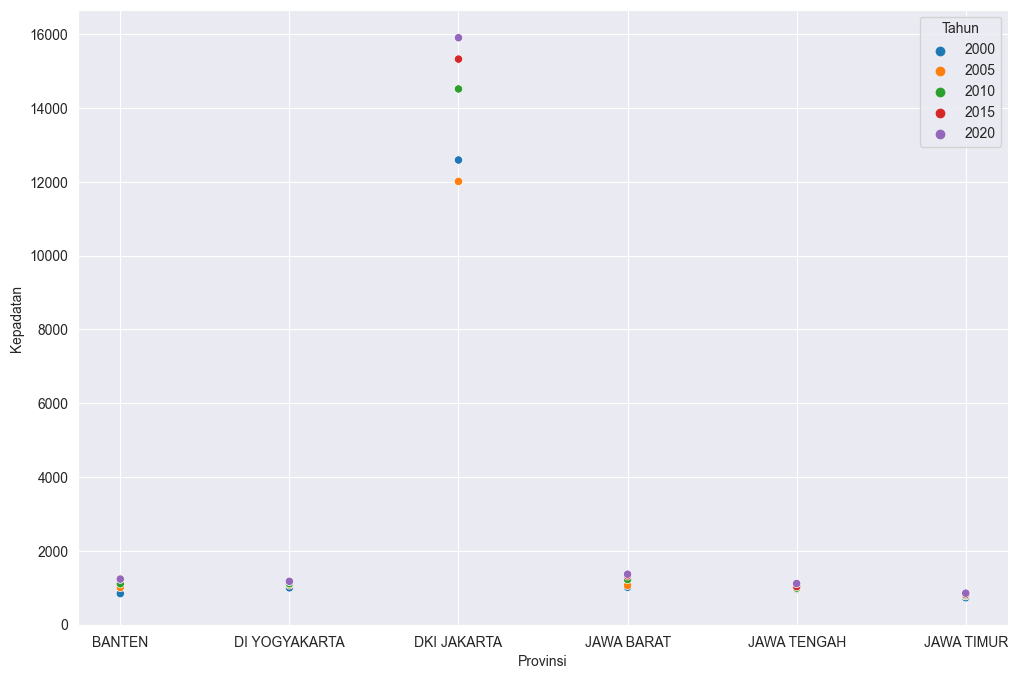

In [113]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_melt,x='Provinsi',y='Kepadatan',hue='Tahun')
plt.show()

In [114]:
df_pivot = df_melt.pivot(index='Provinsi', columns='Tahun', values='Kepadatan')
df_pivot

Tahun,2000,2005,2010,2015,2020
Provinsi,,,,,
BANTEN,838,1006,1106,1237,1232
DI YOGYAKARTA,996,1074,1107,1174,1171
DKI JAKARTA,12592,12012,14518,15328,15907
JAWA BARAT,1010,1060,1222,1320,1365
JAWA TENGAH,952,972,989,1030,1113
JAWA TIMUR,727,781,786,813,851


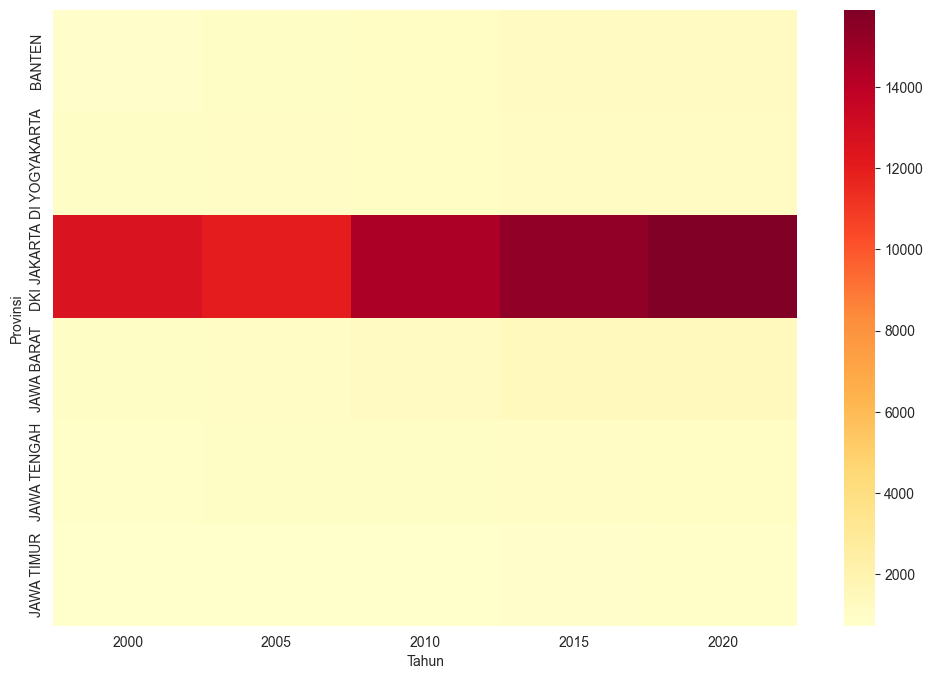

In [115]:
plt.figure(figsize=(12,8))
sns.heatmap(df_pivot, cmap='YlOrRd')
plt.show()